In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Alcohol_Sales.csv")

In [3]:
data

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
...,...,...
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504


In [4]:
data.head

<bound method NDFrame.head of            DATE  S4248SM144NCEN
0    1992-01-01            3459
1    1992-02-01            3458
2    1992-03-01            4002
3    1992-04-01            4564
4    1992-05-01            4221
..          ...             ...
320  2018-09-01           12396
321  2018-10-01           13914
322  2018-11-01           14174
323  2018-12-01           15504
324  2019-01-01           10718

[325 rows x 2 columns]>

In [5]:
data.tail

<bound method NDFrame.tail of            DATE  S4248SM144NCEN
0    1992-01-01            3459
1    1992-02-01            3458
2    1992-03-01            4002
3    1992-04-01            4564
4    1992-05-01            4221
..          ...             ...
320  2018-09-01           12396
321  2018-10-01           13914
322  2018-11-01           14174
323  2018-12-01           15504
324  2019-01-01           10718

[325 rows x 2 columns]>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DATE            325 non-null    object
 1   S4248SM144NCEN  325 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [7]:
data.describe

<bound method NDFrame.describe of            DATE  S4248SM144NCEN
0    1992-01-01            3459
1    1992-02-01            3458
2    1992-03-01            4002
3    1992-04-01            4564
4    1992-05-01            4221
..          ...             ...
320  2018-09-01           12396
321  2018-10-01           13914
322  2018-11-01           14174
323  2018-12-01           15504
324  2019-01-01           10718

[325 rows x 2 columns]>

In [8]:
data.dtypes

DATE              object
S4248SM144NCEN     int64
dtype: object

In [9]:
data.columns

Index(['DATE', 'S4248SM144NCEN'], dtype='object')

In [10]:
data.isnull().sum()

DATE              0
S4248SM144NCEN    0
dtype: int64

In [11]:
data = pd.read_csv("Alcohol_Sales.csv", parse_dates=['DATE'], index_col='DATE')

In [12]:
data

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
...,...
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174


In [13]:
data.dtypes

S4248SM144NCEN    int64
dtype: object

In [14]:
data.columns

Index(['S4248SM144NCEN'], dtype='object')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 325 entries, 1992-01-01 to 2019-01-01
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   S4248SM144NCEN  325 non-null    int64
dtypes: int64(1)
memory usage: 5.1 KB


In [17]:
data.describe

<bound method NDFrame.describe of             S4248SM144NCEN
DATE                      
1992-01-01            3459
1992-02-01            3458
1992-03-01            4002
1992-04-01            4564
1992-05-01            4221
...                    ...
2018-09-01           12396
2018-10-01           13914
2018-11-01           14174
2018-12-01           15504
2019-01-01           10718

[325 rows x 1 columns]>

In [18]:
data.isnull().sum()

S4248SM144NCEN    0
dtype: int64

In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [20]:

result = adfuller(data['S4248SM144NCEN'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

data['S4248SM144NCEN_diff'] = data['S4248SM144NCEN'].diff().dropna()

ADF Statistic: 2.0374047259136914
p-value: 0.9987196267088919


In [21]:
train_size = int(len(data) * 0.8)
train, test = data['S4248SM144NCEN'][:train_size], data['S4248SM144NCEN'][train_size:]

In [22]:
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

predictions = model_fit.forecast(steps=len(test))


D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA Model - RMSE: 761.3240614102389, MAE: 607.6516239428468


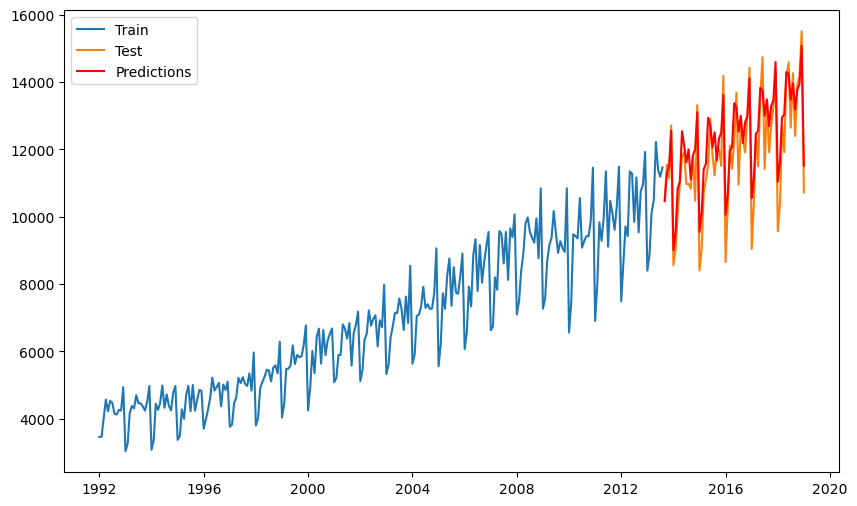

In [23]:
rmse = np.sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)
print(f'ARIMA Model - RMSE: {rmse}, MAE: {mae}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(predictions, label='Predictions', color='red')
plt.legend()
plt.show()


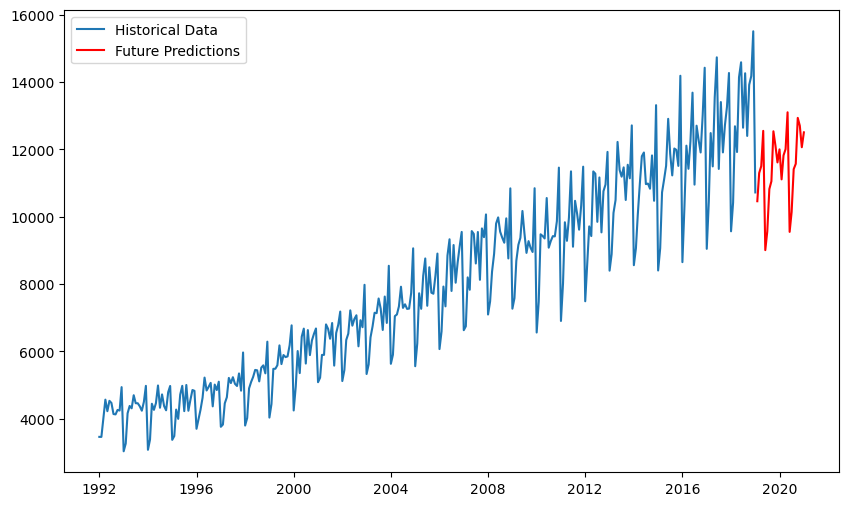

In [24]:

future_steps = 24  
future_predictions = model_fit.forecast(steps=future_steps)


plt.figure(figsize=(10, 6))
plt.plot(data['S4248SM144NCEN'], label='Historical Data')
plt.plot(pd.date_range(data.index[-1], periods=future_steps, freq='M'), future_predictions, label='Future Predictions', color='red')
plt.legend()
plt.show()